# Running Stable Diffusion

The goal here is to create an image given a text prompt using stable diffusion 2.1.

https://huggingface.co/stabilityai/stable-diffusion-2-1

In [1]:
%%capture
!apt-get update && apt-get install libgl1 -y
!pip install --upgrade diffusers[torch]
#!pip install transformers[torch]
!python -m pip install transformers[torch]
!pip install setuptools-rust
!pip install opencv-python

In [2]:
import transformers
print(transformers.__version__)
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from PIL import Image
import torch
import numpy as np
import cv2

4.31.0


2023-08-19 10:22:01.222387: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
def generate_image(prompt):
    image = pipe(prompt).images[0]
    image.save("image.png")
    image.show()

  0%|          | 0/50 [00:00<?, ?it/s]

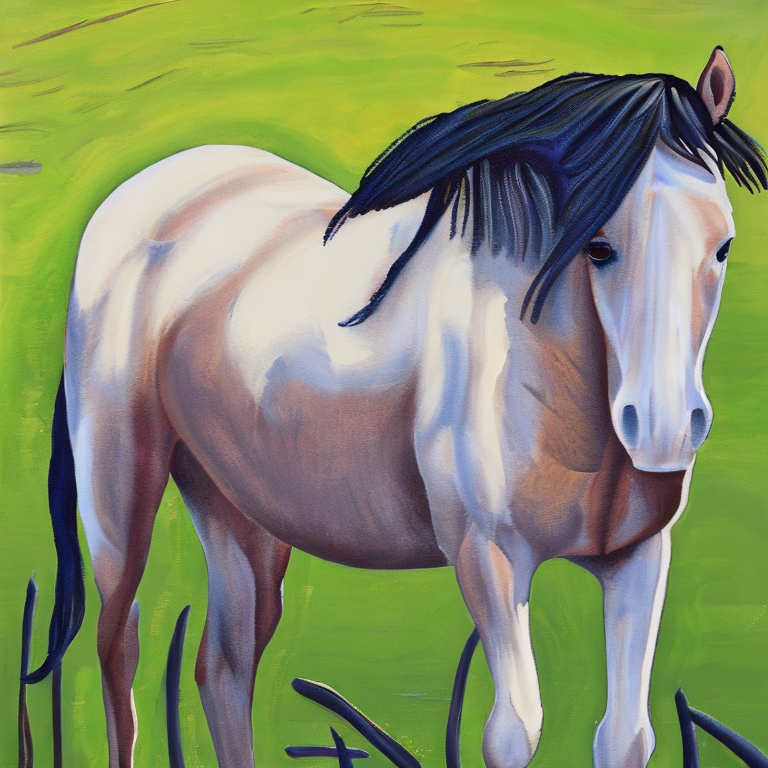

In [5]:
generate_image('Painting of a horse in a green field')